# [코들 오리지널] 구글 검색량 데이터 분석하기

코로나는 2019년 12월 중국 우한에서 처음 보고되어 현재는 전 세계에 퍼져있는 바이러스이다. 사람들은 정보를 찾기 위해서 구글을 사용한다. 그렇다면 코로나와 관련된 키워드의 검색량은 어떻게 달라졌을까?

1. 데이터 불러오기
2. 그래프 색상 설정 및 범례 표시하기
3. 제목 및 x축 y축 설정하기
4. 각 그래프에서 최대값 찾기
5. 최대값을 가지는 시간 가져오기
6. 연도별 검색량 비교하기
7. 백신과 코로나 그래프에서 차이지점 찾고 그 이유 추론하기
8. 마스크와 코로나 그래프에서 차이지점 찾고 그 이유 추론하기

### 예제 1.
데이터를 불러와주세요.
* `pd.read_csv`를 사용하면 파일을 데이터로 불러올 수 있어요.
* 데이터의 앞부분 5개를 살펴보아요. `df.head` 함수를 사용하면 데이터의 앞부분을 반환해줘요

In [24]:
import pandas as pd # ㅔpandas 라이브러리를 불러옵니다. 관례적으로 pd라는 별칭을 사용합니다.

df = pd.read_csv('covid.csv')
# salt.csv 파일을 불러와서 df라는 이름의 데이터 프레임에 저장하기
df.head() # 데이터의 앞부분을 출력한다

# year, month, day - 해당 일자를 의미합니다
# 코로나, 마스크, 백신 - 해당 키워드의 검색량을 의미합니다.

,코로나,마스크,year,month,day,백신
0,0,3,2019,2,3,0
1,0,3,2019,2,10,0
2,0,4,2019,2,17,1
3,0,4,2019,2,24,1
4,0,12,2019,3,3,0


### 예제 2.
코로나, 마스크, 백신의 변화가 시간에 따라 어떻게 이루어지는지 관찰할 수 있도록 그래프를 그려주세요.
* `plt.plot(값, label='이름')`을 사용하면 값을 그릴 수 있습니다
* `plt.legend()`를 사용하면 범례를 그릴 수 있습니다.
* `plt.show()`를 사용하면 이때까지 그린 것을 출력할 수 있습니다.

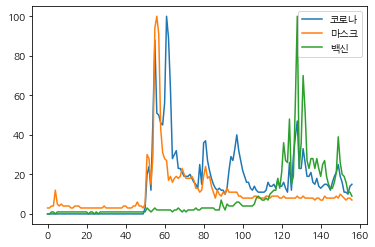

In [11]:
import matplotlib.pyplot as plt

plt.plot(df['코로나'], label='코로나')
plt.plot(df['마스크'], label='마스크')
plt.plot(df['백신'], label='백신')
plt.legend()
plt.show()

### 예제 3.
앞서 그린 그래프에 표의 제목과 x, y축의 제목을 설정해주세요.
* `plt.title(이름)`을 사용하면 제목을 설정할 수 있습니다
* `plt.xlabel(이름)`을 사용하면 x축의 이름을 지어줄 수 있습니다.
* `plt.ylabel(이름)`을 사용하면 y축의 이름을 지어줄 수 있습니다.

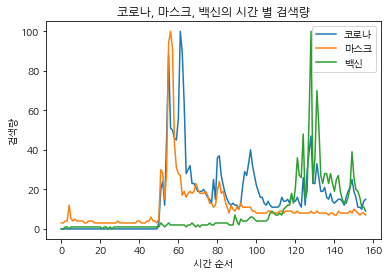

In [21]:
plt.plot(df['코로나'], label='코로나')
plt.plot(df['마스크'], label='마스크')
plt.plot(df['백신'], label='백신')
plt.legend()

plt.title('코로나, 마스크, 백신의 시간 별 검색량')
plt.xlabel('시간 순서')
plt.ylabel('검색량')
plt.show()

### 예제 4.
`코로나`, `마스크`, `백신` 각 용어 별로 검색량의 최대값을 찾아 출력해주세요.
* `df[<column 이름>]`을 사용하면 데이터에서 그 이름을 가지는 열을 가져올 수 있어요.
* 가져온 열에서 `max` 함수를 호출하면 그 열의 최대값을 가져올 수 있어요.

In [22]:
corona_max = df['코로나'].max()
mask_max = df['마스크'].max()
vaccine_max = df['백신'].max()
print(corona_max, mask_max, vaccine_max)

100 100 100


### 예제 5.
* `df[df[<column 이름>] == 값]`을 사용하면 그 열이 해당 값인 모든 행을 가져올 수 있어요.

In [23]:
print(df[df['코로나'] == corona_max]) # 2020년 4월 5일
print(df[df['마스크'] == mask_max]) # 2020년 3월 1일
print(df[df['백신'] == vaccine_max]) # 2021년 7월 18일

    코로나  마스크  year  month  day  백신
61  100   27  2020      4    5   2
    코로나  마스크  year  month  day  백신
56   51  100  2020      3    1   2
     코로나  마스크  year  month  day   백신
128   47    9  2021      7   18  100


### 예제 6.
코로나와 마스크의 추이가 비슷한 이유를 추론해보고, 그에 알맞은 사건을 하나 제시하세요.

코로나가 퍼지면서 마스크의 수요가 증가했을 것이다. 예시) 마스크 대란

### 예제 7.
코로나와 백신의 추이가 다른 이유를 추론해보고, 그에 알맞은 사건을 하나 제시하세요.

코로나가 퍼지고 나서 백신에 대한 소식이 들려오며 검색량이 증가했을 것이다. 예시) 백신 개발 관련 뉴스

### 예제 8.
추가적으로 분석할 것이 있으면 자유롭게 분석해 주세요.

코로나 그래프는 마스크에 비해 많은 피크가 있다. 마스크는 초반에는 수요가 커 공급 대란이 일어났지만, 후반에는 공급이 안정화되었기 때문에 후반에는 코로나에 비해 검색량이 줄어든듯 하다.